## Introduction

India is one of the fastest growing economy in the world. There is a lot of innovative startups coming up in the region and a lot of funding for these startups as well.

In this notebook, let us explore the Indian Startup Funding data and understand more about the ecosystem and the changes over time.

![Indian Startup Ecosystem](https://e-syndicate.net/wp-content/uploads/2019/06/India-is-building-more-opportunities-for-its-startup-Eco-system.png)
Image Source: e-syndicate.net

The data used in this notebook is from [Trak.in](https://trak.in/india-startup-funding-investment-2015/) and would like to sincerely thank them for making the data available to public.

**Most of the plots are interactive and so please hover over them to see more details**

In [1]:
import os
import string
import datetime
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
# import seaborn as sns
# color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

Let us read the dataset and look at the top few rows to start with.

In [2]:
df = pd.read_csv("../input/startup_funding.csv")
df.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in ["StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))
    
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",nan
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",nan
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",nan
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",nan
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",nan


* We have details about 3009 funding deals in this data
* The data is available from January 2015 till September 2019

## Number Of Fundings

In this section, let us see how the number of fundings have changed over time.

In [3]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'

df["year"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

cnt_srs = df["year"].value_counts()
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals over years",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Years 2015 & 2016 has got more number of fundings compared to the recent years
* We can see a clear decling trend in the number of funding deals from 2016. Not sure of the exact reason. One thing could be that not all the funding deals are captured in the recent days.

In [4]:
import datetime
df["yearmonth"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').apply(lambda x: datetime.date(x.year,x.month,1))

cnt_srs = df["yearmonth"].value_counts()
cnt_srs = cnt_srs.sort_index()
trace = go.Scatter(
    x=cnt_srs.index.astype(str),
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals - month on month",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

We can see a steady decline here as well but seems to be increasing in the last few months.

## Funding Values

Now let us look at the distribution of funding values to understand how much does investors generally invest.

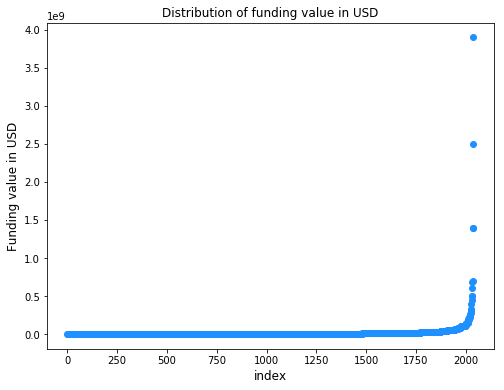

In [5]:
def clean_amount(x):
    #x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

df["CleanedAmount"] = df["AmountInUSD"].apply(lambda x: float(clean_amount(x)))
AmountInUSD = df["CleanedAmount"]
AmountInUSD = AmountInUSD[~np.isnan(AmountInUSD)]
AmountInUSD = AmountInUSD[AmountInUSD!=-999]
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color="#1E90FF")
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.title("Distribution of funding value in USD")
plt.show()

There are some extreme values at the right. Let us see who are these very well funded startups.

In [6]:
df.iloc[df["CleanedAmount"].sort_values(ascending=False).index[:5]]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
25,26,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,"3,900,000,000",nan,2019,2019-08-01,3.900000e+09
616,618,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000",nan,2017,2017-08-01,2.500000e+09
795,799,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000",nan,2017,2017-05-01,1.400000e+09
931,940,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000",nan,2017,2017-03-01,1.400000e+09
2613,2654,28/7/2015,Flipkart.com,Online Marketplace,nan,Bangalore,Steadview Capital and existing investors,Private Equity,"700,000,000","Late Stage, 10th Round More here",2015,2015-07-01,7.000000e+08


* Rapido Bike Taxi looks like leading the pack by raising 3.9 Billion USD. But wait, this looks fishy. Infact [Rapido raised 3.9 Billion INR](https://yourstory.com/2019/08/startup-funding-bike-taxi-app-rapido-series-b-westbridge-capital) and not USD. So this one is around 54 Million USD. **This also shows that the data is not very accurate and so there should be caution in using it.**
* Three of the next four high fundings are flipkart which seems to be expected and the other one is PayTM.
* Also [Swiggy raised 1 Billion USD](https://techcrunch.com/2018/12/20/swiggy-raises-1-billion/) last year which is not in the data.

We will correct the data for Rapido and do the following analysis.

In [7]:
df["CleanedAmount"][df["CleanedAmount"]==3900000000] = 50000000

cnt_df = df.groupby('year')['CleanedAmount'].agg(["sum", "mean"])
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Sum of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Though 2016 is the year with most number of funding deals, it is the year with the lowest sum (2019 is yet to complete)
* 2017 has got the highest total amount of funding in the last 5 years. Out of the 10B in 2017, 5.5B is raised by Flipkart and PayTM in 3 deals which we can see in the table above the plot. 

In [8]:
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Mean of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* When it comes to the mean value of funding, 2019 leads the pack with an average of 32 Million USD. (This also raises the doubt that whether the low funding deals are not captured properly in the recent days)

## Investment Type

Now let us explore the investment type of the funding deals like whether it is seed funding, private equity funding or so on.

In [9]:
import re
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df['InvestmentType'] = df['InvestmentType'].apply(lambda x: remove_punctuation(str(x)))

funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
    "Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

for i, v in funding_map.items():
    df['InvestmentType'][df['InvestmentType']==i] = v 

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['InvestmentType'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Count of Investment type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Seed funding tops the chart closely followed by Private Equity and seed angel funding
* We can clearly see the decreasing number of deals as we move up the stages of funding rounds like Series A, B, C & D

In [10]:
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:10,:]
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title=go.layout.Title(
        text="Sum of investment amount by Investment Type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Private equity funding seems to be the one with high number of deals and the highest sum value of 26.7B raised as well
* Though seed funding has 1388 funding deals, the sum of money raised is just about 500M since they happen during the very early stages of a startup.

Now let us see what is the average value raised by the startups in each of these funding rounds. 

In [11]:
#cnt_df = cnt_df.iloc[:10,:]
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title=go.layout.Title(
        text="Mean Investment amount by Funding Round",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* We can see a clear increase in the mean funding value as we go up the funding round ladder from Seed funding to Series D as expected.



## Location

Now let us explore the location of the startups that got funded. This can help us to understand the startup hubs of India. 

Since there are multiple locations in the data, let us plot the top 10 locations. We will also club New Delhi, Gurgaon & Noida together to form NCR for the below chart.

In [12]:
location_map = {
    "Bengaluru": "Bangalore",
    "Delhi": "NCR",
    "New Delhi": "NCR",
    "Gurugram": "NCR",
    "Gurgaon": "NCR",
    "Noida": "NCR"
}
for i, v in location_map.items():
    df['City'][df['City']==i] = v 

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['City'].value_counts()[:14]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals in each location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* NCR & Bangalore are almost equal to each other with respect to number of funding deals followed by Mumbai in third place.
* Chennai, Hyderabad & Pune are the next set of cities are that are catching up.

In [13]:
cnt_df = df.groupby('City')['CleanedAmount'].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:14,:]

cnt_srs = cnt_df['sum']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Total funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Though NCR tops the number of funding deals when it comes to the total funding value by location, Bangalore leads the way by a huge margin.


In [14]:
cnt_srs = cnt_df['mean']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Bangalore tops the list here again
* Jaipur took the fourth spot with respect to mean funding value

In [15]:
temp_df = df.groupby(["City","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
cities_to_use = ["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad"]
temp_df = temp_df[temp_df["City"].isin(cities_to_use)]
temp_df.columns = ["City", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [16]:
fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

## Industry Vertical

Let us now have a look at the industry verticals and the number of funding deals for each vertical.

In [17]:
location_map = {
    "eCommerce": "E-Commerce",
    "ECommerce": "E-Commerce"
}
for i, v in location_map.items():
    df['IndustryVertical'][df['IndustryVertical']==i] = v 

cnt_srs = df['IndustryVertical'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by Industry Vertical",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

Consumer Internet is the most preferred industry segment for funding followed by Technology and E-commerce.

In [18]:
temp_df = df.groupby(["IndustryVertical","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["IndustryVertical"].isin(values_to_use)]
temp_df = temp_df[temp_df["year"]!=2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [19]:
fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()


## Investors

Now let us see who are the important investors in Indian ecosystem.

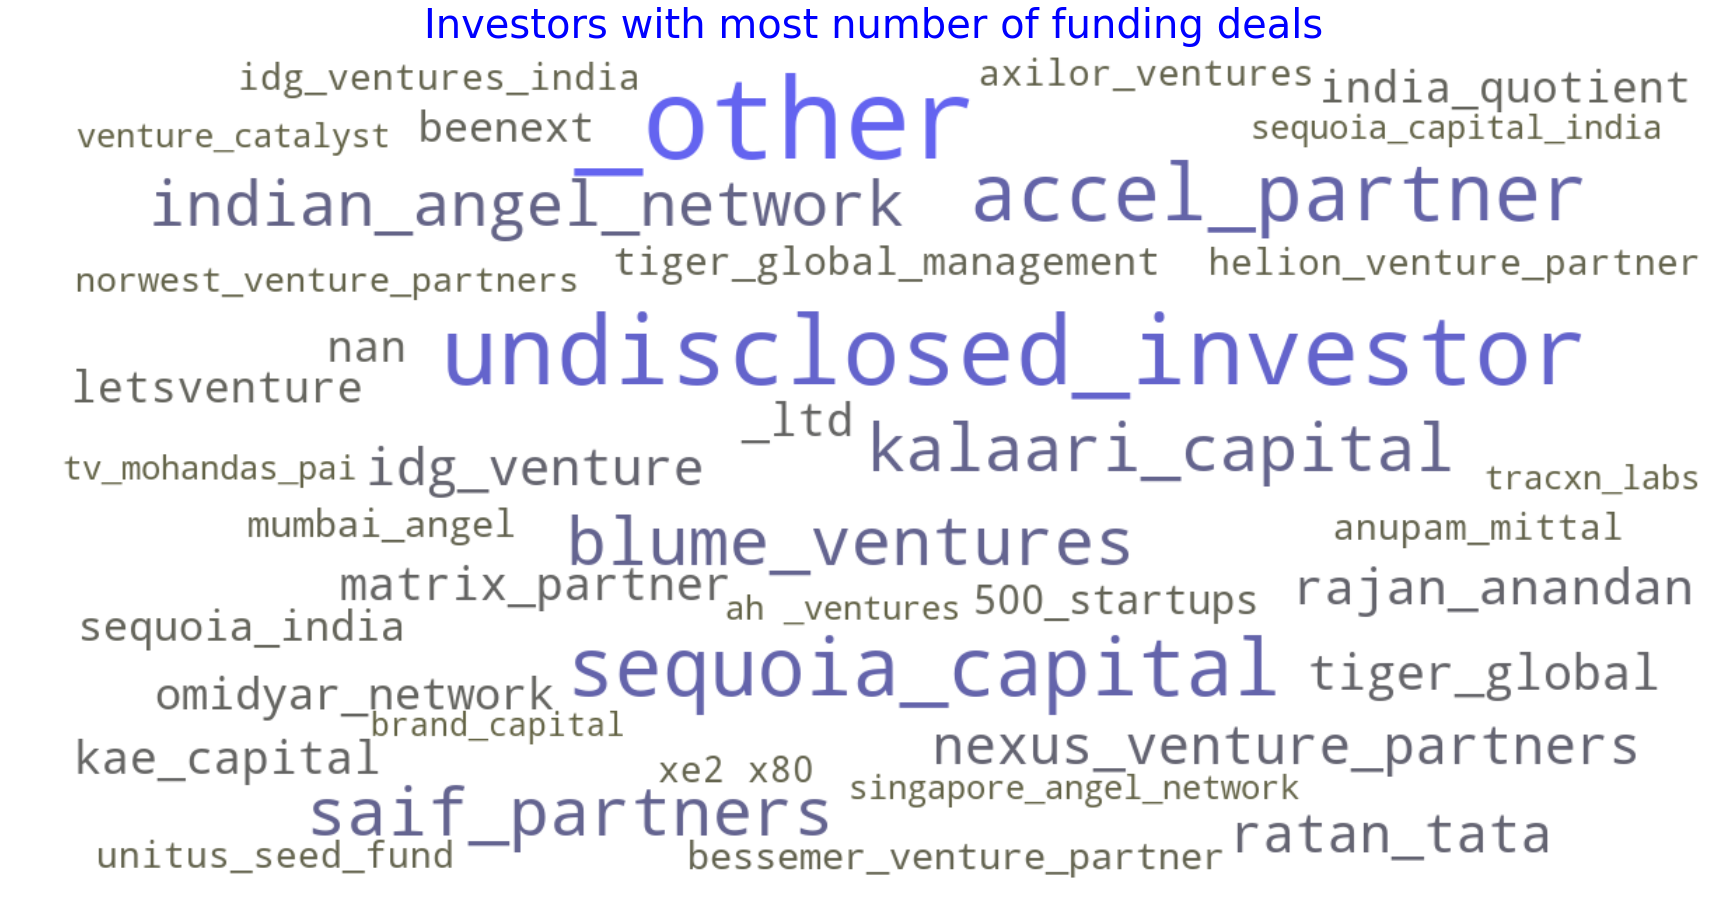

In [20]:
from wordcloud import WordCloud, STOPWORDS
import random
random.seed(123)

inv_names = []
for invs in df['InvestorsName']:
    for inv in str(invs).split(","):
        if inv != "":
            inv_names.append(inv.strip().lower().replace(" ","_").replace("'",""))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    #return "hsl(0, 0%%, %d%%)" % (font_size*3)
    return (100, 100, font_size*3)

def plot_wordcloud(text, mask=None, max_words=40, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=grey_color_func):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    prefer_horizontal = 1.0,
                    max_font_size = max_font_size, 
                    min_font_size = 10,
                    random_state = 42,
                    #color_func = lambda *args, **kwargs: (140,0,0),
                    #color_func = color_map(),
                    colormap="Blues",
                    width=1200, 
                    height=600,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_color), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'color': 'blue',
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(' '.join(inv_names), title="Investors with most number of funding deals")

In [21]:
cnt_srs = pd.Series(inv_names).value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by Investor Name",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Of the disclosed investors, Sequoia capital is the major investor in Indian startups (based on count) followed by Accel partners.
* Blume ventures, Kalaari capital and Saif partners - all of them have 49 investments each
* Among the individual investors, Ratan Tata leads the pack followed by Rajan Anandan.



## Sub Vertical

Let us create a word cloud on sub vertical column to get the top words.

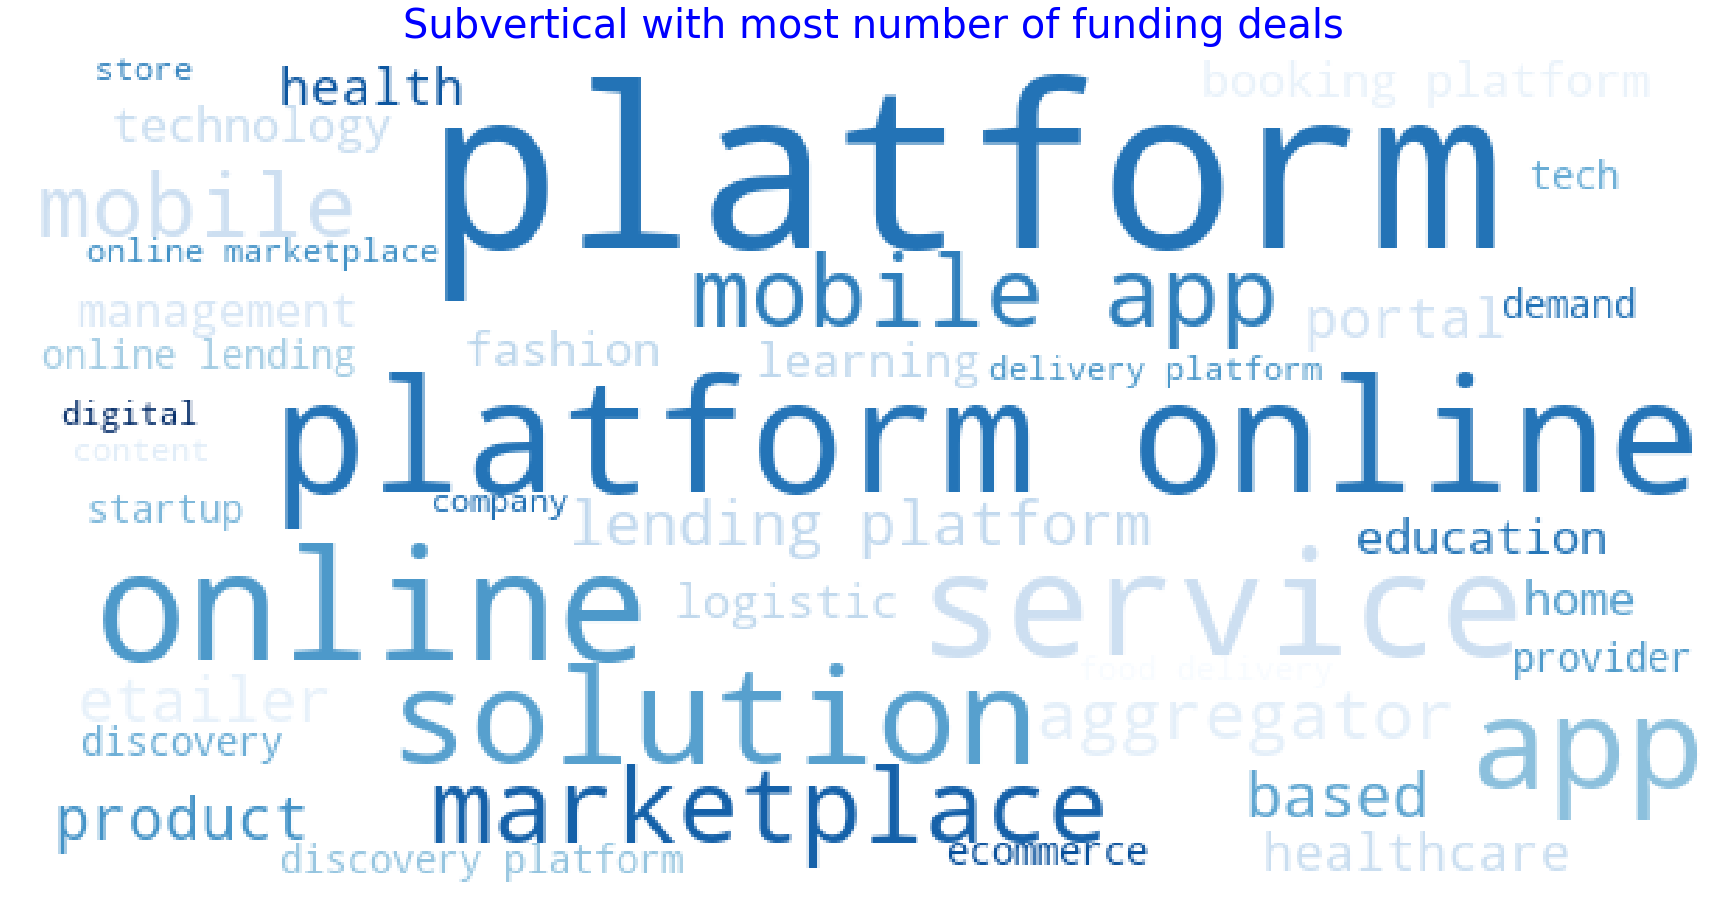

In [22]:
inv_names = []
for invs in df['SubVertical']:
    for inv in str(invs).split():
        if inv != "":
            inv_names.append(inv.strip().lower().replace("'",""))
            
def plot_wordcloud(text, mask=None, max_words=40, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'nan', ' nan'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    prefer_horizontal = 1.0,
                    max_font_size = max_font_size, 
                    min_font_size = 10,
                    random_state = 42,
                    #color_func = lambda *args, **kwargs: (140,0,0),
                    #color_func = color_map(),
                    colormap="Blues",
                    width=600, 
                    height=300,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_color), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'color': 'blue',
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

plot_wordcloud(' '.join(inv_names), title="Subvertical with most number of funding deals")

`Platform` seems to be the most occurring word followed by words like `online`, `solution`, `marketplace`, `mobile`

**More to come. Stay Tuned.!**